## Setup

### Leer datos y liberías

In [313]:
# Se cargan las librerías
from pandas import DataFrame
from pandas import concat
import random
from scipy import stats
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pandas import DataFrame
from pandas import concat
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from IPython.display import YouTubeVideo
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from darts import TimeSeries
import pmdarima as pm
from darts import TimeSeries
from darts.models import (NaiveSeasonal,NaiveDrift,RNNModel,Prophet,ExponentialSmoothing,ARIMA,AutoARIMA,TCNModel,TransformerModel,Theta,FFT)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [314]:
df = pd.read_excel('datos.xlsx')
df.replace(0, np.nan, inplace=True)

### Ajustes pandémicos

Agregue una simple función que traza una recta entre el inicio de la pandemia y el fin de la misma. Acá se podría mejorar la interpolación aplicando quizas una función que interpole en base a la tendencia y la estacionalidad de los periodos previos.

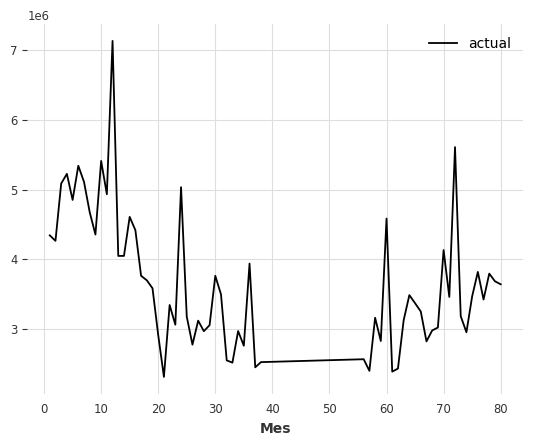

In [332]:
#Inicio y fin de pandemia
feb_2020_index = df[df['mes'] == '2020-02-01'].index[0]
sep_2020_index = df[df['mes'] == '2021-08-01'].index[0]
start_value = df.at[feb_2020_index, 'v_retail']
end_value = df.at[sep_2020_index, 'v_retail']

#Interpolación lineal
# Pendiente de la recta
slope = (end_value - start_value) / (sep_2020_index - feb_2020_index)

# Interpolar valores
for i in range(feb_2020_index + 1, sep_2020_index):
    df.at[i, 'v_retail'] = start_value + slope * (i - feb_2020_index)
    
# Se grafican la base completa
df['v_retail'].plot(label='actual')
plt.legend()
plt.xlabel('Mes');


### Preparar conjuntos de dátos

In [316]:
train = df[:int(0.85*(len(df)))].iloc[1:]
test = df[int(0.85*(len(df))):]

In [317]:
# Se crea la serie de tiempo de train y test para las diferentes predicciones
# tr_{columna} = dataframe de train
# ts_{columna} = dataframe de test
# df_{columna} = dataframe de df
# trs_{columna} = serie de tiempo de train
# tss_{columna} = serie de tiempo de test 
# dfs_{columna} = serie de tiempo de df

tr_retail = pd.DataFrame({
    'ds': train['mes'],
    'y': train['v_retail']
})
ts_retail = pd.DataFrame({
    'ds': test['mes'],
    'y': test['v_retail']
})
df_retail = pd.DataFrame({
    'ds': df['mes'],
    'y': df['v_retail']
})

trs_retail = TimeSeries.from_dataframe(tr_retail, 'ds', 'y')
tss_retail = TimeSeries.from_dataframe(ts_retail, 'ds', 'y')
dfs_retail = TimeSeries.from_dataframe(df_retail, 'ds', 'y')

## Modelos

### Suavizado exponencial

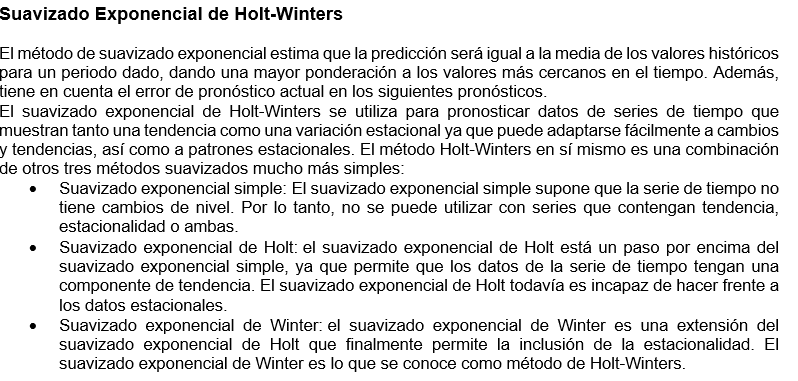

#### Suavizado exponencial simple

In [318]:

from darts.utils.utils import ModelMode, SeasonalityMode
resultados = pd.DataFrame()

Test RMSE: 701625.898
Test MSE: 492278900665.989
Test MAE: 643367.713
Test R2: -0.108


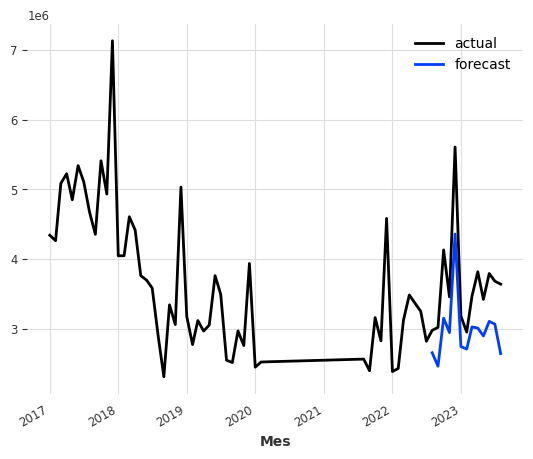

In [319]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing()
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Simple','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

#### Suavizado Exponencial de Holt

Test RMSE: 701625.898
Test MSE: 492278900665.989
Test MAE: 643367.713
Test R2: -0.108


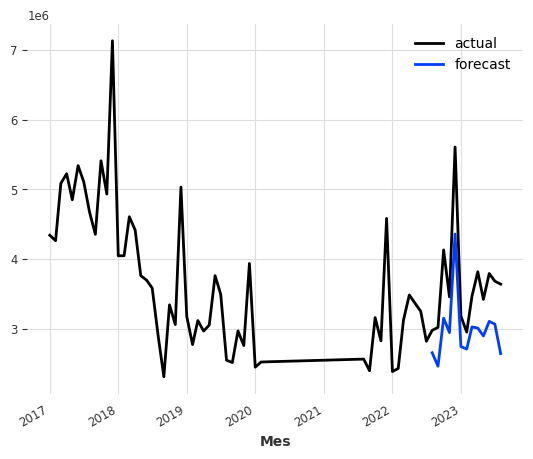

In [320]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.ADDITIVE) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Holt (Add)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

Test RMSE: 815355.614
Test MSE: 664804777577.633
Test MAE: 756593.890
Test R2: -0.497


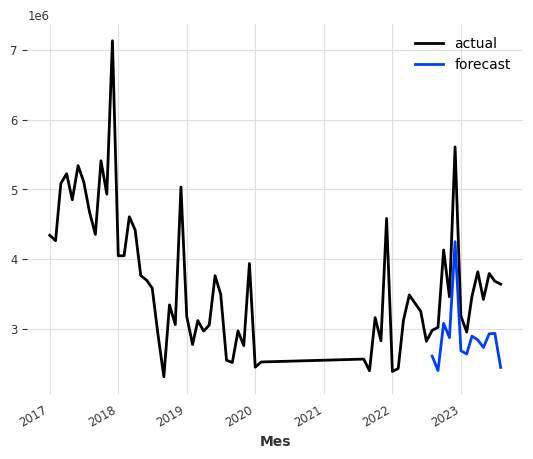

In [321]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Holt (Mult)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

#### Suavizado de Winter

Test RMSE: 701625.898
Test MSE: 492278900665.989
Test MAE: 643367.713
Test R2: -0.108


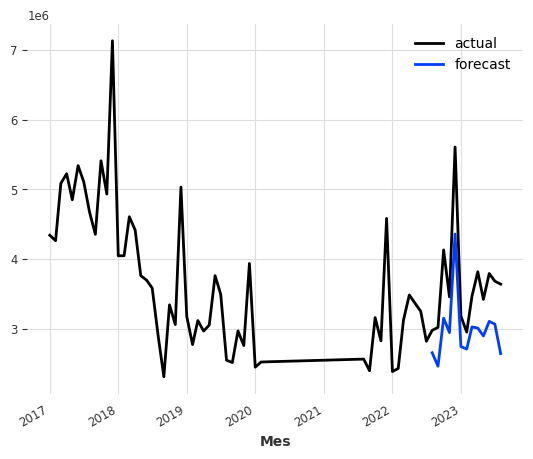

In [322]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.ADDITIVE,seasonal_periods=12) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Winter (Add,Add)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

Test RMSE: 815355.614
Test MSE: 664804777577.633
Test MAE: 756593.890
Test R2: -0.497


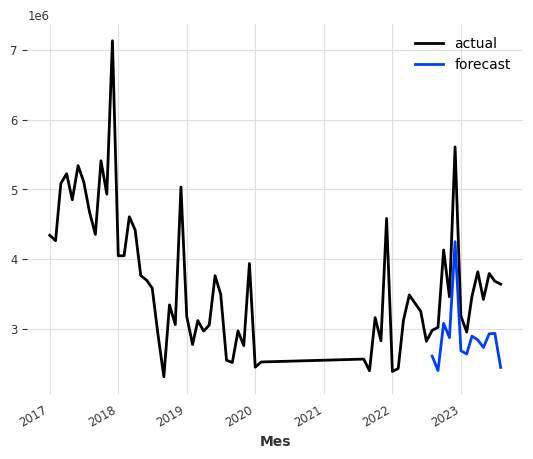

In [323]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE, seasonal=SeasonalityMode.ADDITIVE,seasonal_periods=12) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Winter (Mult,Add)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

Test RMSE: 1230113.594
Test MSE: 1513179452914.700
Test MAE: 1149511.852
Test R2: -2.407


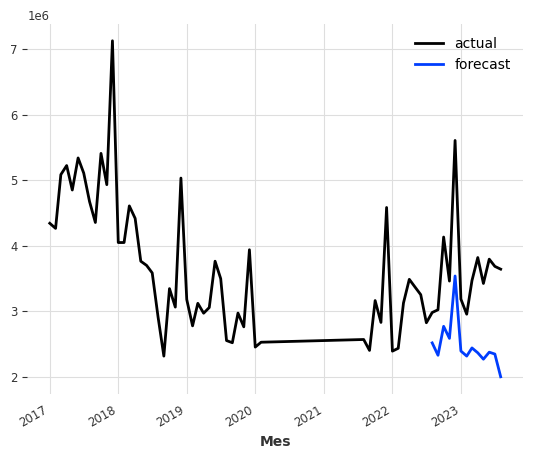

In [324]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE, seasonal=SeasonalityMode.MULTIPLICATIVE,seasonal_periods=12) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Winter (Mult,Mult)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

In [325]:
resultados

,Modelo,RMSE,MSE,MAE,R2
0,EXS: Simple,7.016259e+05,4.922789e+11,6.433677e+05,-0.108375
0,EXS: Holt (Add),7.016259e+05,4.922789e+11,6.433677e+05,-0.108375
0,EXS: Holt (Mult),8.153556e+05,6.648048e+11,7.565939e+05,-0.496820
0,"EXS: Winter (Add,Add)",7.016259e+05,4.922789e+11,6.433677e+05,-0.108375
0,"EXS: Winter (Mult,Add)",8.153556e+05,6.648048e+11,7.565939e+05,-0.496820
0,"EXS: Winter (Mult,Mult)",1.230114e+06,1.513179e+12,1.149512e+06,-2.406951


### AutoARIMA

Test RMSE: 909977.413
Test MSE: 828058891714.405
Test MAE: 632497.541
Test R2: -0.864


Text(0.5, 0, 'Mes')

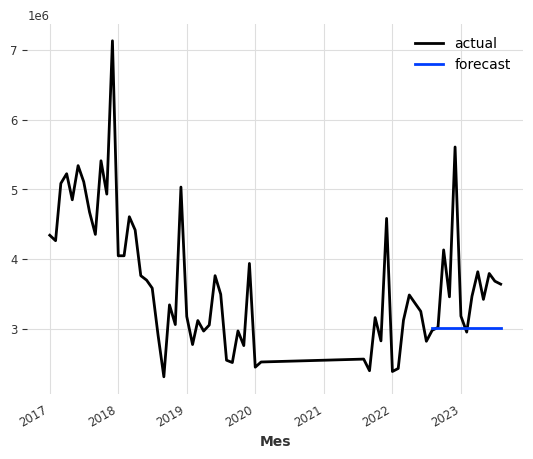

In [326]:
# Se inicializa, se entrena el modelo y se generan las predicciones
model_aarima = AutoARIMA(random_state = 10)
model_aarima.fit(trs_retail)
prediction = model_aarima.predict(len(tss_retail))
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'AutoARIMA','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes')

### **RNN (LSTM)**

In [327]:
# Se normaliza la base
from darts.dataprocessing.transformers import Scaler
transformer = Scaler()
train_transformed = transformer.fit_transform(trs_retail)
test_transformed = transformer.transform(tss_retail)
series_transformed = transformer.transform(dfs_retail)

In [328]:
# Se inicializa, se entrena el modelo y se generan las predicciones
model_RNN = RNNModel( model='LSTM',
    input_chunk_length=10,
    output_chunk_length=1,
    hidden_dim=25,
    n_rnn_layers=2,
    dropout=0.2,
    batch_size=32,
    n_epochs=100,
    optimizer_kwargs={'lr': 1e-3},
    log_tensorboard=True,
    random_state=42)
model_RNN.fit(train_transformed)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 8.0 K 
4 | V             | Linear           | 26    
---------------------------------------------------
8.0 K     Trainable params
0         Non-trainable params
8.0 K     Total params
0.032     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 58.04it/s, v_num=logs, train_loss=0.0233]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 54.81it/s, v_num=logs, train_loss=0.0233]


RNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=2, dropout=0.2, training_length=24, input_chunk_length=10, output_chunk_length=1, batch_size=32, n_epochs=100, optimizer_kwargs={'lr': 0.001}, log_tensorboard=True, random_state=42)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 99.74it/s] 


Test RMSE: 3689922.692
Test MSE: 13615529474267.330
Test MAE: 3629240.232
Test R2: -29.656


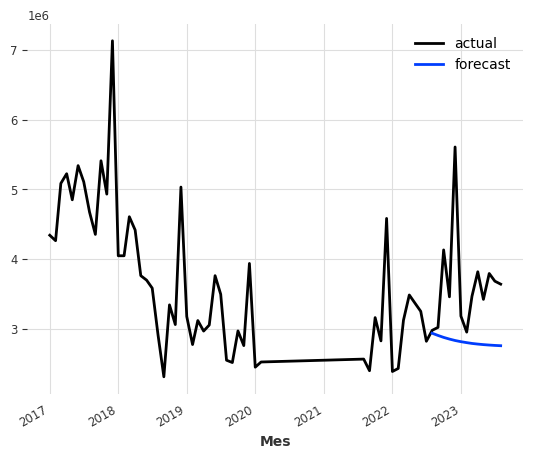

In [329]:
prediction = model_RNN.predict(len(test_transformed))
transformer.inverse_transform(prediction)

# Cálculo de las medidas de precisión
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)

row = pd.DataFrame([{'Modelo':'RNN (LSTM)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
transformer.inverse_transform(series_transformed).plot(label='actual')
transformer.inverse_transform(prediction).plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');


### **FFT (Fast Fourier Transform)**

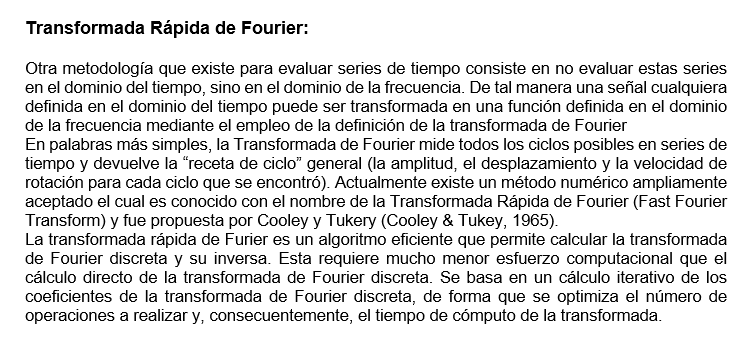

Test RMSE: 1400116.412
Test MSE: 1960325967282.426
Test MAE: 1288637.668
Test R2: -3.414


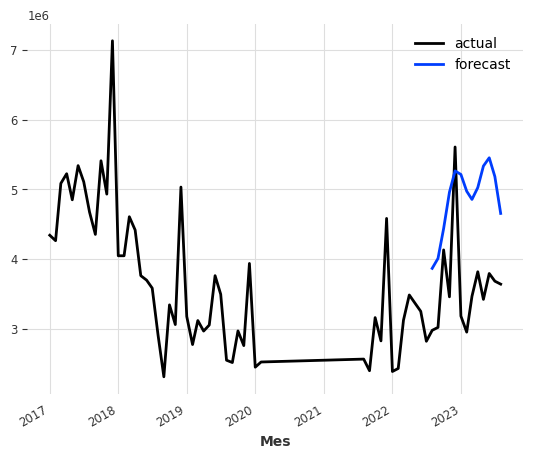

In [330]:
# Se inicializa, se entrena el modelo y se generan las predicciones
model = FFT()
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'Fast Fourier Transform (FFT)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

In [331]:
resultados

,Modelo,RMSE,MSE,MAE,R2
0,EXS: Simple,7.016259e+05,4.922789e+11,6.433677e+05,-0.108375
0,EXS: Holt (Add),7.016259e+05,4.922789e+11,6.433677e+05,-0.108375
0,EXS: Holt (Mult),8.153556e+05,6.648048e+11,7.565939e+05,-0.496820
0,"EXS: Winter (Add,Add)",7.016259e+05,4.922789e+11,6.433677e+05,-0.108375
0,"EXS: Winter (Mult,Add)",8.153556e+05,6.648048e+11,7.565939e+05,-0.496820
0,"EXS: Winter (Mult,Mult)",1.230114e+06,1.513179e+12,1.149512e+06,-2.406951
0,AutoARIMA,9.099774e+05,8.280589e+11,6.324975e+05,-0.864389
0,RNN (LSTM),3.689923e+06,1.361553e+13,3.629240e+06,-29.655609
0,Fast Fourier Transform (FFT),1.400116e+06,1.960326e+12,1.288638e+06,-3.413709
